In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 파일 읽어오기
rating_df = pd.read_csv('u.data', sep='\t', header=None, names = ['userID', 'movieID', 'rating', 'timestamp'])

In [21]:
# Reader = 읽기 위한 객체, 이걸로 rating_df를 dataset으로 읽어온다.
from surprise import Dataset, Reader

rdr = Reader(line_format="user item rating", sep="\t") ## 반드시 사용자-아이템-평점 순서로
data = Dataset.load_from_df(rating_df[['userID', 'movieID', 'rating']], reader=rdr)

In [ ]:
# split
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2, random_state=1004)
testset

## KNN으로 추천시스템 맛보기

In [24]:
# KNN 모델 불러와서 fit
from surprise import KNNBasic
recom_sys = KNNBasic()
recom_sys.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [25]:
# testset의 예측 결과 보기
# uid=741, iid=281, r_ui=2.0, est=3.0157043977599276
# userid, itemid, actual, predict
pred = recom_sys.test(testset)
pred[:10]

[Prediction(uid=741, iid=281, r_ui=2.0, est=3.0157043977599276, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=815, iid=1039, r_ui=5.0, est=4.189696979582676, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=859, iid=275, r_ui=3.0, est=4.179615056742424, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=344, iid=385, r_ui=2.0, est=3.6297683122416315, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=934, iid=705, r_ui=4.0, est=4.212865753346653, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=130, iid=1079, r_ui=3.0, est=2.2903597107054585, details={'actual_k': 31, 'was_impossible': False}),
 Prediction(uid=308, iid=180, r_ui=5.0, est=4.337853509446571, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=655, iid=127, r_ui=5.0, est=4.420096618467276, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=374, iid=196, r_ui=1.0, est=4.157519812489398, details={'ac

In [ ]:
# testset의 rmse error 확인하기
from surprise import accuracy
accuracy.rmse(recom_sys.test(testset))

In [29]:
# 예측 결과 예쁘게 출력해보기
for p in pred[:20]:
    print(f'user : {p.iid:<4}, movie : {p.uid}, rating : {p.r_ui} -- > {p.est:.2f}, diff : {p.r_ui - p.est:>5.2f}')

user : 281 , movie : 741, rating : 2.0 -- > 3.02, diff : -1.02
user : 1039, movie : 815, rating : 5.0 -- > 4.19, diff :  0.81
user : 275 , movie : 859, rating : 3.0 -- > 4.18, diff : -1.18
user : 385 , movie : 344, rating : 2.0 -- > 3.63, diff : -1.63
user : 705 , movie : 934, rating : 4.0 -- > 4.21, diff : -0.21
user : 1079, movie : 130, rating : 3.0 -- > 2.29, diff :  0.71
user : 180 , movie : 308, rating : 5.0 -- > 4.34, diff :  0.66
user : 127 , movie : 655, rating : 5.0 -- > 4.42, diff :  0.58
user : 196 , movie : 374, rating : 1.0 -- > 4.16, diff : -3.16
user : 222 , movie : 758, rating : 4.0 -- > 3.67, diff :  0.33
user : 151 , movie : 537, rating : 2.0 -- > 3.44, diff : -1.44
user : 455 , movie : 359, rating : 4.0 -- > 3.49, diff :  0.51
user : 527 , movie : 870, rating : 5.0 -- > 3.89, diff :  1.11
user : 1221, movie : 885, rating : 3.0 -- > 3.44, diff : -0.44
user : 102 , movie : 846, rating : 2.0 -- > 3.18, diff : -1.18
user : 847 , movie : 894, rating : 4.0 -- > 3.78, diff 

C:\Users\User\AppData\Local\Temp\ipykernel_12004\2294920983.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


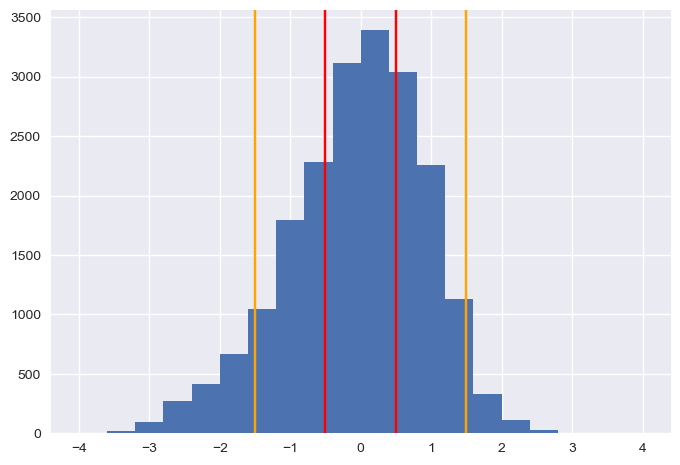

In [35]:
# error 그래프 그려보기
error_list = []
for p in pred:
    error_list.append(p.r_ui - p.est)
    
plt.style.use('seaborn')
plt.hist(error_list, bins = 20)
# vertical line. 이 안에 들어오는 것들은 반올림하면 정확하게 예측된 것.
plt.axvline(-0.5, color = 'red')
plt.axvline(0.5, color = 'red')
# 이 안에 들어오는 것들은 반올림하면 별점 1 틀린 것.
plt.axvline(-1.5, color = 'orange')
plt.axvline(1.5, color = 'orange')

별점 예측은 지도 학습, 회귀 모델.

### 랜덤으로 testdata 하나 만들어서 이사람한테 영화 추천해주기!

1. 유저 선택   
1. 유저가 안본 영화 리스트   
1. 영화 리스트에 대한 평점 전부 예측   
1. 예측 평점이 가장 높은 N개의 영화 선택

In [39]:
# 1. 유저 선택
import random
# 랜덤으로 testdata 하나 만들어서 사람 하나 뽑기
usr, mv, rating = testset[random.randint(0, 20000)]
usr, mv, rating

(95, 241, 3.0)

In [45]:
movie_info_df = pd.read_csv('u.item', sep='|', encoding='latin', header=None)
movie_info_df.columns = ['movieID' , 'movie_title' , 'release_date' , 'video_release_date' ,
                        'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
                        'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
                        'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
                        'Thriller' , 'War' , 'Western']

movie_name = movie_info_df.loc[mv]
print(movie_name['movie_title'], '- predicted score : ', pred.est, 'real score :', rating)
print(f'{movie_name.movie_title} - predicted score : , {pred.est:.2f}, real score : {rating}')

Kolya (1996) - predicted score :  3.771097813686495 real score : 3.0
Kolya (1996) - predicted score : , 3.77, real score : 3.0


In [51]:
# 2. 유저가 안본 영화 리스트

# 전체 영화 id 가져옴
all_movie_ids = rating_df.movieID.unique()
# 이 사람이 본 영화 id 가져옴
watched_movie_ids = rating_df[rating_df['userID']==usr].movieID
# 전체 영화에서 이 사람이 본 영화 id 삭제
target_mv_list = set(all_movie_ids) - set(watched_movie_ids)

In [57]:
# 영화 리스트에 대한 평점 전부 예측, 
# 하나의 유저에 대해 모든 target mv list의 예상 점수 dict
# dataframe으로 바로 변환하려면 dictionary를 list로 저장!
all_pred_scores = []
for s_mv_id in target_mv_list:
    
    all_pred_scores.append({'movieID' : s_mv_id, 'pred_score':recom_sys.predict(usr, s_mv_id).est})

pred_df = pd.DataFrame(all_pred_scores)
pred_df

,movieID,pred_score
0,4,3.767246
1,5,3.362626
2,6,3.532598
3,9,3.867392
4,10,3.683215
...,...,...
1399,1678,1.000000
1400,1679,3.000000
1401,1680,2.000000
1402,1681,3.000000


In [60]:
# 예측 평점이 가장 높은 N개의 영화 선택
pred_df = pred_df.sort_values('pred_score', ascending=False)
recom_mv_ids = pred_df[pred_df['pred_score'] == 5]

In [62]:
result_df = pd.merge(movie_info_df, recom_mv_ids, on='movieID')
result_df['movie_title']

0                         Great Day in Harlem, A (1994)
1           Two or Three Things I Know About Her (1966)
2                        They Made Me a Criminal (1939)
3                                    Prefontaine (1997)
4            Marlene Dietrich: Shadow and Light (1996) 
5                                       Star Kid (1997)
6                                The Deadly Cure (1996)
7                                      Boys, Les (1997)
8                  Saint of Fort Washington, The (1993)
9                               Tough and Deadly (1995)
10                                 Aiqing wansui (1994)
11                                       Everest (1998)
12    Entertaining Angels: The Dorothy Day Story (1996)
Name: movie_title, dtype: object

### 많은 모델의 예측 성능 보기

In [67]:
from surprise import KNNBasic, BaselineOnly, CoClustering, KNNBaseline, NMF, SVD
models = [KNNBasic(), BaselineOnly(), CoClustering(random_state=0), KNNBaseline(), NMF(random_state=0), SVD(random_state=0)]

for m in models:
    m.fit(trainset)
    accuracy.rmse(m.test(testset))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9792
Estimating biases using als...
RMSE: 0.9397
RMSE: 0.9650
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9268
RMSE: 0.9625
RMSE: 0.9321


## 유사도 계산해보기

In [23]:
# 이렇게 하면 데이터 12.1 MB, 밀도는 6%... 별로 좋은 방법은 아니다.
pv_tb = pd.pivot_table(data = rating_df, values = 'rating', index = 'movieID', columns = 'userID').fillna(0)
pv_tb

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# user-based 유사도 계산하려고 sklearn 도움을 받자
from sklearn.metrics.pairwise import cosine_similarity
# .T는 왜? 대상(유저)이 가로 방향으로 있어야 우리가 원하는 계산이 나온다.
cos_matrix = cosine_similarity(pv_tb.T, pv_tb.T)
cos_matrix

array([[1.        , 0.16693098, 0.04745954, ..., 0.14861694, 0.17950788,
        0.39817474],
       [0.16693098, 1.        , 0.11059132, ..., 0.16148478, 0.17226781,
        0.10579788],
       [0.04745954, 0.11059132, 1.        , ..., 0.10124256, 0.13341615,
        0.02655587],
       ...,
       [0.14861694, 0.16148478, 0.10124256, ..., 1.        , 0.1016418 ,
        0.09511958],
       [0.17950788, 0.17226781, 0.13341615, ..., 0.1016418 , 1.        ,
        0.18246466],
       [0.39817474, 0.10579788, 0.02655587, ..., 0.09511958, 0.18246466,
        1.        ]])

In [25]:
print(cos_matrix[500, 253]) # 501번 사람과 254번 사람의 유사도
print(cos_matrix[500, 400])
print(cos_matrix[240, 253])
# 2번 사람과 가장 가까운 사람 구하기
# 나와 가장 가까운 사람은 나 자신이니까 나를 0으로 하고 구하자
cos_matrix[1][1] = 0
np.argmax(cos_matrix[1]) # => 701번 사람과 가장 가까움!

0.09450221616419205
0.17703001466410098
0.041579251029907664


700

In [1]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split
import surprise

reader = Reader(line_format="user item rating", sep="\t") 
data = Dataset.load_from_df(rating_df[['userID', 'movieID', 'rating']], reader=reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

sim_options = {'name': 'msd'}
# sim_options : 어떤 유사도 사용해서 KNN 할건지
recom_sys = surprise.KNNBasic(k = 60, min_k = 1, sim_options=sim_options)
recom_sys.fit(trainset)
test_pred = recom_sys.test(testset)
test_pred[:2]

NameError: name 'rating_df' is not defined

### ml dataset, KNN - 최적화 연습 
- 모델을 바꿔가면서 test
- 유사도 변경해가면서 test
- 최적의 K값을 찾기

In [ ]:

from surprise import accuracy
# KNNBasic k = 20, option : msd, accuracy : 0.977005247044411
# KNNWithMeans k = 40, option : pearson_baseline, accuracy : 0.9358099115568047    k = 20, option : pearson_baseline, accuracy : 0.9374377269689211
# KNNWithZScore k = 30, option : pearson_baseline, accuracy : 0.9355606048086371
# ** KNNBaseline k = 50, option : pearson_baseline, accuracy : 0.9197114241432861
opt = [{'name': 'cosine'}, {'name': 'msd'}, {'name': 'pearson'}, {'name': 'pearson_baseline'}]
for kk in range(10, 101, 10):
    for op in opt:
        # sim_options : 어떤 유사도 사용해서 KNN 할건지
        recom_sys = surprise.KNNBaseline(k = kk, sim_options=op, verbose = False)
        recom_sys.fit(trainset)
        acc = accuracy.rmse(recom_sys.test(testset))
        optionName = op['name']
        print(f'k = {kk}, option : {optionName}, accuracy : {acc}')